# CS498PS - Lab 2: Filter Design and Usage

For this lab you will learn how to design some simple filters and how to apply them to solve some common audio problems. Python’s scipy.signal package has an extensive set of commands to help you design filters (firwin, firwin2, butter, cheby1, cheby2,  ellip, …), so there is no shortage of options.

## Part 1: When to use what 

There will be four cases to this part, each requiring a different type of filter to address a problem in a recording.  The input recordings are:

- ```case1.wav``` [https://drive.google.com/uc?export=download&id=1eTsDiXqqLQv3murPz25O54E89i3DL__d ] : A noise-corrupted speech signal. We want to eliminate the noise.
- ```case2.wav``` [https://drive.google.com/uc?export=download&id=1egd22CxPUe6sINIi0FPTbMfG4S_In2hT ] : Same as above, different type of noise. We want to remove the noise again.
- ```case3.wav``` [https://drive.google.com/uc?export=download&id=1eF-VOVWoT1rh1wAC06WT1ANusMKyDYSn ] : Bird songs during a thunderstorm. As a world renowned ornithologist you need to have a cleaner recording of the bird songs for further analysis.
- ```case4.wav``` [https://drive.google.com/uc?export=download&id=1eeizGhrBICf6pW5OXcbq7ChF4m2N6yIk ]: The signal that we require to extract here is a Morse code which is buried in environmental noise. Design a filter to bring out the beeps.

For each case do the following:
- Plot the spectrogram of the given sound and identify the problem
- Describe what kind of filter will address this problem and why
- Design an FIR filter using ```scipy.signal.firwin()``` and/or ```scipy.signal.firwin2()```
- Design an FIR filter using the formulas in my slides (i.e. do not use ```scipy.signal```)
- Design an IIR Butterworth filter using ```scipy.signal```'s routines
- Show a plot comparing the response of all the filters (hint: ```scipy.signal.freqz```)
- Plot spectrograms of the filtered recordings and compare with the input to show that it fixed the problem
- Play the filtered sounds so that we can hear how well it works

Make some observations on how the results differ between an FIR and IIR filter and try to find the best possible filter size/type/parameters to produce the best result. Show results under various parameters (e.g. filter length) and make some plots that demonstrate the effects of these parameters. Most importantly, try to get a sense of how these design choices impact audible quality. Being able to listen at a sound and identify what’s wrong and how to fix it is a big part of audio processing.

Hint: To apply an FIR filter you can use ```scipy.signal.convolve```, to apply an IIR filter (or an FIR) you can use ```scipy,signal.lfilter```.


In [1]:
import scipy
import scipy.io.wavfile
import numpy as np
import math
import scipy.signal as sg
import matplotlib
import matplotlib.pyplot as pp

def sound( x, rate=8000, label=''):
    from IPython.display import display, Audio, HTML
    display( HTML( 
    '<style> table, th, td {border: 0px; }</style> <table><tr><td>' + label + 
    '</td><td>' + Audio( x, rate=rate)._repr_html_()[3:] + '</td></tr></table>'
    ))

def stft(input_sound, dft_size, hop_size, zero_pad, window):
    # YOUR CODE HERE
    pad = list(input_sound) + list (zero_pad*[0])
    tempMatrix = []
    for i in range(0, len(pad)-dft_size+1, hop_size):
#         print(pad[i:i+dft_size])
        tempMatrix.append(pad[i:i+dft_size]*window)
    return np.fft.rfft(tempMatrix, axis=1)

def plotSpectrogram(inputSound, sampleRate):
    dft_size = 1024
    # print("input_sound", len(input_sound))
    # print("dft_size", dft_size)
    segmentLength = (math.ceil(len(inputSound)/dft_size))
    zero_pad = segmentLength*dft_size-len(inputSound)
    # print("zero_pad", zero_pad)
    window = np.hanning(dft_size)
    window[0] = 0.00000000001
    window[-1] = 0.00000000001
    stftResult = stft(inputSound, dft_size, dft_size // 4, zero_pad, window)
    matplotlib.pyplot.pcolormesh(np.log(abs(stftResult)).T)
    pp.pcolormesh(abs(stftResult).T**0.1)

# Design a filter that fixes things
# YOUR CODE HERE

# raise NotImplementedError()

# Show me the resulting spectrogram and sound
# YOUR CODE HERE

# raise NotImplementedError()

# Repeat for cases 2, 3, and 4
# YOUR CODE HERE

# raise NotImplementedError()

# Case 1

Case 1 has high frequency noise.  We can use a low pass filter to remove the frequencies past a certain point


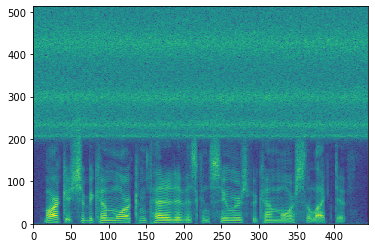

In [129]:
# Load the sound, play it, and plot it's spectrogram
sample_rate, input_sound = scipy.io.wavfile.read('./case1.wav')
input_sound = input_sound.astype('float64')
input_sound /= 2**16 - 1

sound(input_sound,rate=sample_rate, label='case1')
plotSpectrogram(input_sound, sample_rate)
print("Case 1 has high frequency noise.  We can use a low pass filter to remove the frequencies past a certain point")

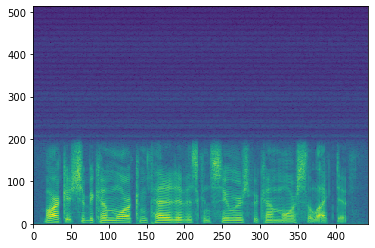

In [130]:
numTaps = 80
cutoff = 180/513*sample_rate/2
fir = sg.firwin(numTaps,cutoff,fs=sample_rate)
fixed = sg.convolve(fir,input_sound)
spectrogram = stft(fixed, 1024, 256, 0, np.hanning(1024)/2)
sound(fixed,rate=sample_rate, label='case1 filter scipy')

pp.pcolormesh(abs(spectrogram).T**0.1)

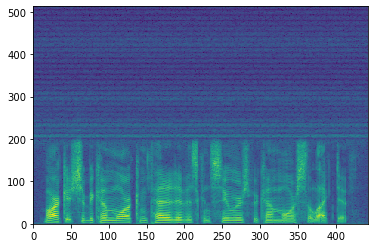

In [131]:
stopNum = 40
window = list(range(-stopNum, stopNum+1))
#w*sinc(nw)
formFilter = [0.38*np.sinc(f*0.38) for f in window]
fixed = sg.convolve(formFilter, input_sound)
spectrogram = stft(fixed, 1024, 256, 0, np.hanning(1024)/2)
sound(fixed,rate=sample_rate, label='case1 filter formula')
pp.pcolormesh(abs(spectrogram).T**0.1)

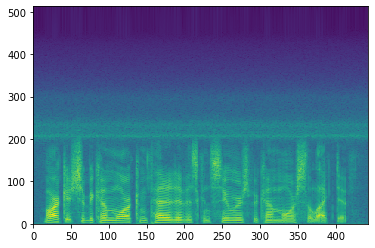

In [132]:
num, denom = sg.butter(8,170/513*sample_rate/2,fs=sample_rate, output = 'ba')
fixed = sg.lfilter(num, denom, input_sound)
spectrogram = stft(fixed, 1024, 256, 0, np.hanning(1024)/2)
sound(fixed,rate=sample_rate, label='case1 filter butter')
pp.pcolormesh(abs(spectrogram).T**0.1)

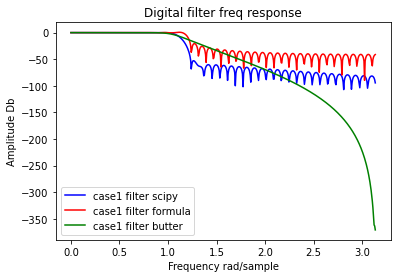

In [133]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title('Digital filter freq response')
width, height = sg.freqz(fir)
ax.plot(width, 20*np.log10(abs(height)),'b',  label='case1 filter scipy')
ax.set_ylabel('Amplitude Db')
ax.set_xlabel('Frequency rad/sample')
# ax2 = ax1.twinx()
width, height = sg.freqz(formFilter)
ax.plot(width, 20*np.log10(abs(height)),'r', label='case1 filter formula')
width, height = sg.freqz(num,denom)
ax.plot(width, 20*np.log10(abs(height)),'g', label='case1 filter butter')
ax.legend()

# CASE 2

Case2 has a phone call in the background on top of someone speaking, the frequencies spread throughout are the speech, and the 4 bright bands are the ringing.  We can remove a cutoff range with our filter.


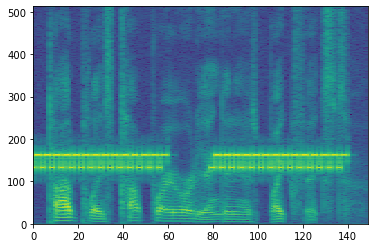

In [134]:
# Load the sound, play it, and plot it's spectrogram
sample_rate, input_sound = scipy.io.wavfile.read('./case2.wav')
input_sound = input_sound.astype('float64')
input_sound /= 2**16 - 1

sound(input_sound,rate=sample_rate, label='case2')
plotSpectrogram(input_sound, sample_rate)
print("Case2 has a phone call in the background on top of someone speaking, " +
      "the frequencies spread throughout are the speech, and the 4 bright bands are the ringing.  We can remove a cutoff range with our filter.")

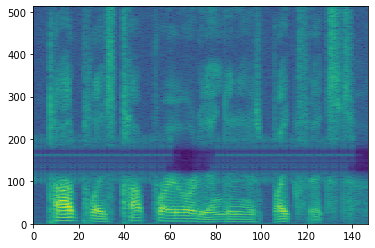

In [135]:
numTaps = 99
cutoff = [1700, 3000]
fir = sg.firwin(numTaps,cutoff,fs=sample_rate)
fixed = sg.convolve(fir,input_sound)
spectrogram = stft(fixed, 1024, 256, 0, np.hanning(1024)/2)
sound(fixed,rate=sample_rate, label='case2 filter scipy')

pp.pcolormesh(abs(spectrogram).T**0.1)

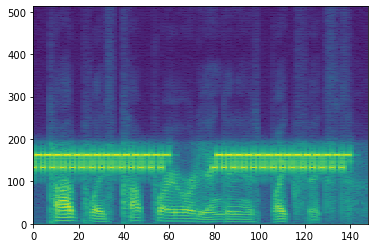

In [136]:
#to be implemented
stopNum = 80
window = list(range(-stopNum, stopNum+1))
formFilter = [0.38*np.sinc(f*0.38) for f in window]
fixed = sg.convolve(formFilter, input_sound)
spectrogram = stft(fixed, 1024, 256, 0, np.hanning(1024)/2)
sound(fixed,rate=sample_rate, label='case2 filter formula')
pp.pcolormesh(abs(spectrogram).T**0.1)

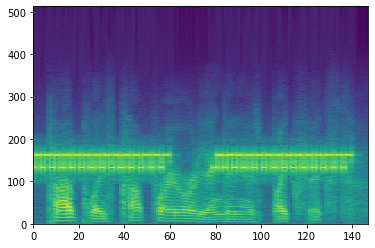

In [137]:
#to be implemented
num, denom = sg.butter(8,170/513*sample_rate/2,fs=sample_rate, output = 'ba')
fixed = sg.lfilter(num, denom, input_sound)
spectrogram = stft(fixed, 1024, 256, 0, np.hanning(1024)/2)
sound(fixed,rate=sample_rate, label='case1 filter butter')
pp.pcolormesh(abs(spectrogram).T**0.1)

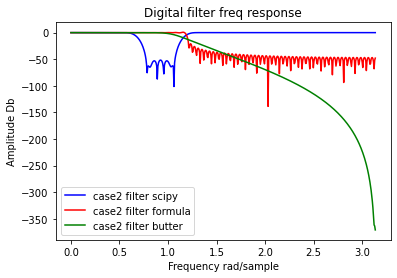

In [138]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title('Digital filter freq response')
width, height = sg.freqz(fir)
ax.plot(width, 20*np.log10(abs(height)),'b',  label='case2 filter scipy')
ax.set_ylabel('Amplitude Db')
ax.set_xlabel('Frequency rad/sample')
# ax2 = ax1.twinx()
width, height = sg.freqz(formFilter)
ax.plot(width, 20*np.log10(abs(height)),'r', label='case2 filter formula')
width, height = sg.freqz(num,denom)
ax.plot(width, 20*np.log10(abs(height)),'g', label='case2 filter butter')
ax.legend()

# case 3

the sound contains high freq bird chirps and low frequency thunder. To isolate the bird chirps you should use high pass filter, but with low taps


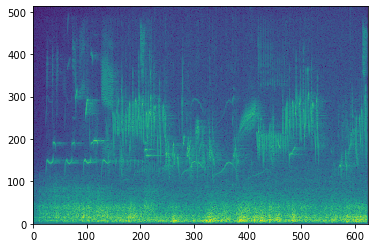

In [139]:
# Load the sound, play it, and plot it's spectrogram
sample_rate, input_sound = scipy.io.wavfile.read('./case3.wav')
input_sound = input_sound.astype('float64')
input_sound /= 2**16 - 1

sound(input_sound,rate=sample_rate, label='case3')
plotSpectrogram(input_sound, sample_rate)
print("the sound contains high freq bird chirps and low frequency thunder. To isolate the bird chirps you should use high pass filter, but with low taps")

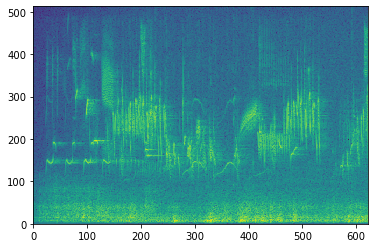

In [140]:
numTaps = 11
cutoff = 1500
fir = sg.firwin(numTaps,cutoff,fs=sample_rate,pass_zero=0 )
fixed = sg.convolve(fir,input_sound)
spectrogram = stft(fixed, 1024, 256, 0, np.hanning(1024)/2)
sound(fixed,rate=sample_rate, label='case3 filter scipy')

pp.pcolormesh(abs(spectrogram).T**0.1)

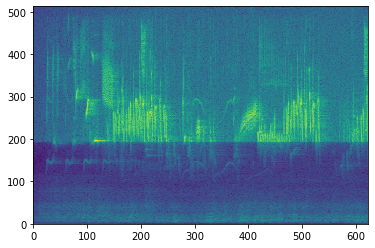

In [141]:
stopNum = 200
window = list(range(-stopNum, stopNum+1))
#w*sinc(nw)
formFilter = []
w = 0.38
for f in window:
    if f == 0:
        formFilter.append(1-w*np.sinc(f*w))
    else:
        formFilter.append(-w*np.sinc(f*w))
fixed = sg.convolve(formFilter, input_sound)
spectrogram = stft(fixed, 1024, 256, 0, np.hanning(1024)/2)
sound(fixed,rate=sample_rate, label='case3 filter formula')
pp.pcolormesh(abs(spectrogram).T**0.1)

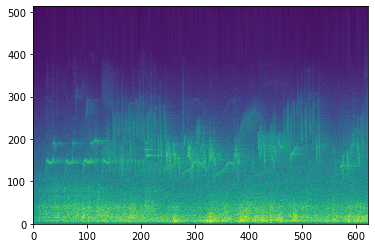

In [142]:
num, denom = sg.butter(8,170/513*sample_rate/2,fs=sample_rate, output = 'ba')
fixed = sg.lfilter(num, denom, input_sound)
spectrogram = stft(fixed, 1024, 256, 0, np.hanning(1024)/2)
sound(fixed,rate=sample_rate, label='case3 filter butter')
pp.pcolormesh(abs(spectrogram).T**0.1)

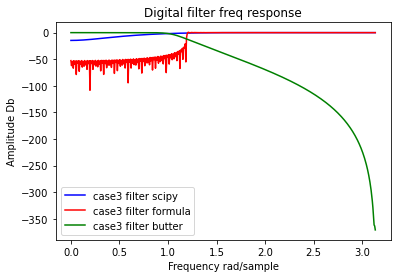

In [143]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title('Digital filter freq response')
width, height = sg.freqz(fir)
ax.plot(width, 20*np.log10(abs(height)),'b',  label='case3 filter scipy')
ax.set_ylabel('Amplitude Db')
ax.set_xlabel('Frequency rad/sample')
# ax2 = ax1.twinx()
width, height = sg.freqz(formFilter)
ax.plot(width, 20*np.log10(abs(height)),'r', label='case3 filter formula')
width, height = sg.freqz(num,denom)
ax.plot(width, 20*np.log10(abs(height)),'g', label='case3 filter butter')
ax.legend()

# case 4

Case 4 contains morse code and background noise. Morse code sounds are in certain frequences, but the background is varied.therefore, we use a band pass filter to only allow the morse code frequencies to pass


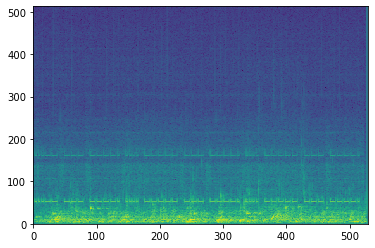

In [144]:
# Load the sound, play it, and plot it's spectrogram
sample_rate, input_sound = scipy.io.wavfile.read('./case4.wav')
input_sound = input_sound.astype('float64')
input_sound /= 2**16 - 1

sound(input_sound,rate=sample_rate, label='case4')
plotSpectrogram(input_sound, sample_rate)
print("Case 4 contains morse code and background noise. Morse code sounds are in certain frequences, but the background is varied."+
     "therefore, we use a band pass filter to only allow the morse code frequencies to pass")

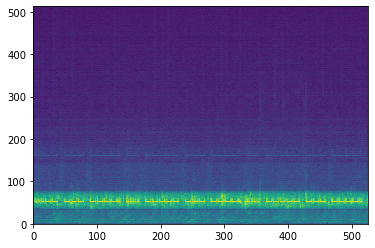

In [145]:
numTaps = 201
cutoff = [700, 1100]
fir = sg.firwin(numTaps,cutoff,fs=sample_rate, pass_zero=0)
fixed = sg.convolve(fir,input_sound)
spectrogram = stft(fixed, 1024, 256, 0, np.hanning(1024)/2)
sound(fixed,rate=sample_rate, label='case4 filter scipy')

pp.pcolormesh(abs(spectrogram).T**0.1)

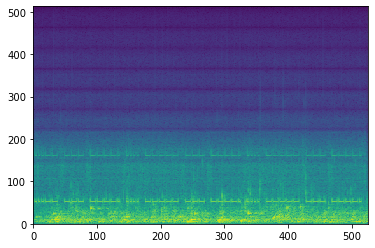

In [146]:
#to be implemented
stopNum = 10
window = list(range(-stopNum, stopNum+1))
formFilter = [0.38*np.sinc(f*0.38) for f in window]
fixed = sg.convolve(formFilter, input_sound)
spectrogram = stft(fixed, 1024, 256, 0, np.hanning(1024)/2)
sound(fixed,rate=sample_rate, label='case4 filter formula')
pp.pcolormesh(abs(spectrogram).T**0.1)

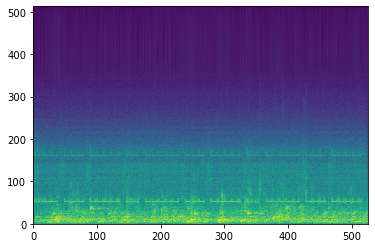

In [147]:
#to be implemented
num, denom = sg.butter(8,170/513*sample_rate/2,fs=sample_rate, output = 'ba')
fixed = sg.lfilter(num, denom, input_sound)
spectrogram = stft(fixed, 1024, 256, 0, np.hanning(1024)/2)
sound(fixed,rate=sample_rate, label='case4 filter butter')
pp.pcolormesh(abs(spectrogram).T**0.1)

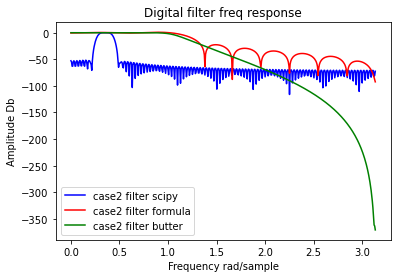

In [148]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title('Digital filter freq response')
width, height = sg.freqz(fir)
ax.plot(width, 20*np.log10(abs(height)),'b',  label='case2 filter scipy')
ax.set_ylabel('Amplitude Db')
ax.set_xlabel('Frequency rad/sample')
# ax2 = ax1.twinx()
width, height = sg.freqz(formFilter)
ax.plot(width, 20*np.log10(abs(height)),'r', label='case2 filter formula')
width, height = sg.freqz(num,denom)
ax.plot(width, 20*np.log10(abs(height)),'g', label='case2 filter butter')
ax.legend()

## Part 2. Designing a simple equalizer

For this part we will design a simple graphic equalizer. We will do so using a more straightforward approach as opposed to a bank of filters as discussed in class.

We want to make an equalizer which contains six bands with center frequencies at 100Hz, 200Hz, 400Hz, 800Hz, 1600Hz and 3200Hz. Your equalizer function will take two inputs, one for the input sound and a 6-element gain vector that will indicate how much to boost or suppress each frequency band. Use the ```scipy.signal.firwin2``` function to design a filter that has the desired characteristics. For various settings of the gain vector, use the ```scipy.signal.freqz``` command to plot the response of the filter and verify that it behaves as indicated. Experiment with various filter lengths and see which works best.

Once you figure that out, design a graphic equalizer with as many bands as you like (and arbitrary center frequencies as well), and use it to solve the problems in part 1 again. The only thing that should be different in the EQ for each recording should be the gains for each band. Play the output sounds, and show the spectrograms, see how they compare with your previous solutions.

Optional extra credit (+1pt): Use ipywidgets to make intective sliders and process an audio stream and play it from the speakers in real-time (either from mic input, or just stream audio from disk).

In [149]:
# Design an equalizer function
def equalizer( input_sound, gains):
    numtaps = 51
    freq = [0, 100, 200, 400, 800, 1600, 3200, 8000]
    gains = [0]+gains
    gains = gains+[0]
    eq = sg.firwin2(numtaps, freq, gains, nyq = 8000, window=None)
    s_eq = sg.convolve(s, eq, mode='same')
    return s_eq, eq

# out of time :(

# Show its response with various gain settings
# YOUR CODE HERE

# raise NotImplementedError()

# Show how it can denoise the examples in part 1
# YOUR CODE HERE
# raise NotImplementedError()